# Analise de Ações usando a API do Yahoo Finance

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pandas_datareader import data as wb

In [21]:
Apple = wb.DataReader('AAPL', data_source = 'yahoo', start = '2000-1-1')

In [22]:
Apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.856887
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.784642
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.796124
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.727229
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.761677


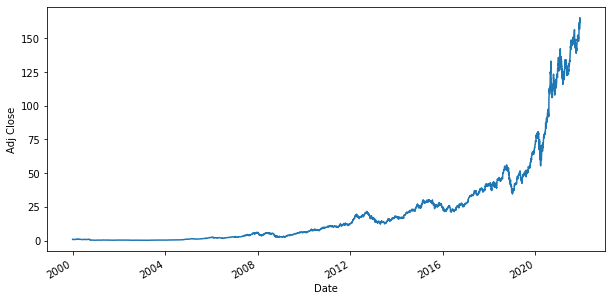

In [26]:
(Apple['Adj Close']).plot(figsize=(10,5))
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.show()

In [33]:
#Definindo a lista de ações a serem analisadas

acoes = ['ABEV3.SA','JBSS3.SA','GGBR3.SA','PETR3.SA','CVCB3.SA','B3SA3.SA']

In [34]:
#Criando um DataFrame do Pandas para receber os dados das ações
dados = pd.DataFrame()

#Importando os dados de cada uma das ações e adicionando no DataFrame
for i in acoes:
    dados[i] = wb.DataReader(i, data_source = 'yahoo', start = '2015-1-1')['Adj Close']
    
#Observar que somente os dados da coluna "Adj Close" foram importados

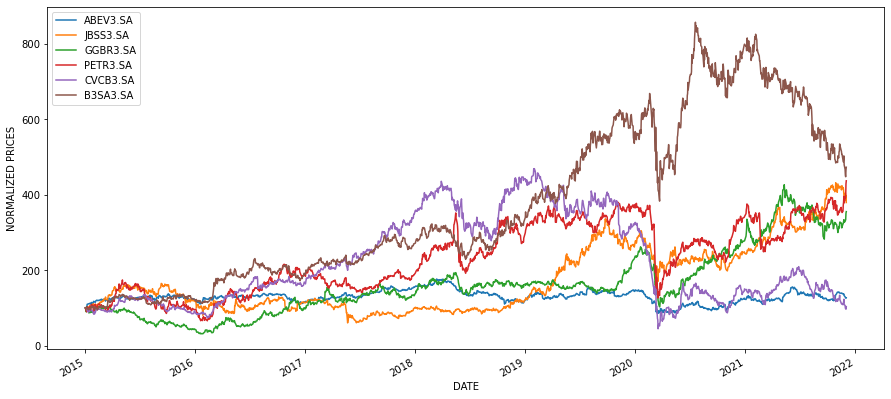

In [35]:
(dados/dados.iloc[0]*100).plot(figsize=(15,7))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.show()

# Calculo da Taxa de Retorno

In [67]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [39]:
MSFT = wb.DataReader('MSFT', data_source = 'yahoo', start = '2000-1-1')
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,36.794228
2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,35.551300
2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,35.926151
2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,34.722687
2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.176453


In [40]:
#Podemos simplificar a formula da Taxa de Retorno para: ((Preço Final / Preço Inicial) - 1)
#Aplicando a formula e adicionando o valor para a coluna 'Taxa_Retorno'
MSFT['Taxa_Retorno'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1

#Visualizando os valores
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Taxa_Retorno
Date,,,,,,,
2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,36.794228,NaN
2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,35.551300,-0.033781
2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,35.926151,0.010544
2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,34.722687,-0.033498
2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.176453,0.013068


<AxesSubplot:xlabel='Date'>

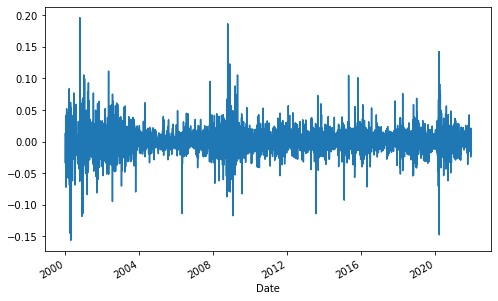

In [41]:
MSFT['Taxa_Retorno'].plot(figsize = (8,5))

In [59]:
retorno_medio = round(MSFT['Taxa_Retorno'].mean()*250,5)
retorno_medio

0.14479

In [64]:
print(str(round(retorno_medio*100,2))+'%')

14.48%


In [75]:
#Obtendo os valores para Microsoft, Apple, Google e Amazon:

acoes = ['MSFT','AAPL', 'GOOG', 'AMZN']
dados = pd.DataFrame()
for i in acoes:
    dados[i] = wb.DataReader(i, data_source = 'yahoo', start = '2005-1-1')['Adj Close']

In [76]:
dados.iloc[0]

MSFT     19.037542
AAPL      0.968976
GOOG    100.976517
AMZN     44.520000
Name: 2005-01-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

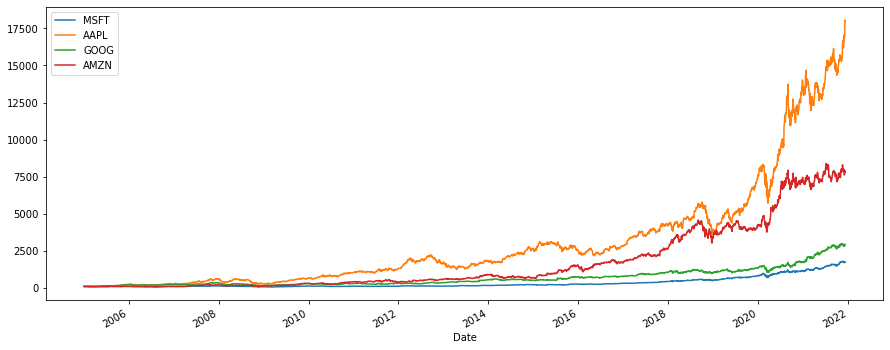

In [77]:
(dados/dados.iloc[0] * 100).plot(figsize = (15,6))

In [79]:
retorno = (dados/dados.shift(1))-1
retorno.head(3)

,MSFT,AAPL,GOOG,AMZN
Date,,,,
2005-01-03,NaN,NaN,NaN,NaN
2005-01-04,0.003740,0.010270,-0.040501,-0.053459
2005-01-05,-0.002235,0.008758,-0.005090,-0.008780


In [87]:
#Considerando a média de retorno anual para simplificar
ret_anual = round(retorno.mean()*250,5)
print(str(round(ret_anual*100,2)))

MSFT    20.41
AAPL    35.86
GOOG    24.12
AMZN    32.60
dtype: float64


In [ ]:
#Considerando que o acionista tem 1 ação de cada,
#então, cada ação representa 25% da sua carteira

peso = np.array([0.25,0.25,0.25,0.25])

In [81]:
#Determinando o produto entre os pesos e os valores de retorno
np.dot(retorno, peso)

array([        nan, -0.01998762, -0.00183675, ...,  0.02992062,
        0.00687897, -0.00599104])